In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

from joblib import load

In [2]:
#use given csv data for the model
data = pd.read_csv("../../../data/RotHam_cleaned/rotterdam_hamburg_clean_new.csv", on_bad_lines="warn")
print('Data read done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

Data read done
Specify test features done
Spliting data done


In [3]:
#Load the trained models
model1 = load('model1.joblib')
model2 = load('model2.joblib')
model3 = load('model3.joblib')
meta_model = load('meta_model.joblib')

print('Loading trained models done')

Loading trained models done


In [4]:
x1_test = model1.predict(X_test)
x2_test = model2.predict(X_test)
x3_test = model3.predict(X_test)
print('Base models prediction done')

Base models prediction done


In [5]:
X_test_meta = np.column_stack((x1_test, x2_test, x3_test))
print('Stack predictions as new features set for meta model done')

Stack predictions as new features set for meta model done


In [6]:
#Make final predictions
final_predictions = meta_model.predict(X_test_meta)
print('Final Prediction done')

Final Prediction done


In [7]:
#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, final_predictions)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print('Mean squared Error for Extra Trees: ', rmse)

Mean absolute Error for Extra Trees:  8.527127544476201
Mean squared Error for Extra Trees:  1053.1825107681304


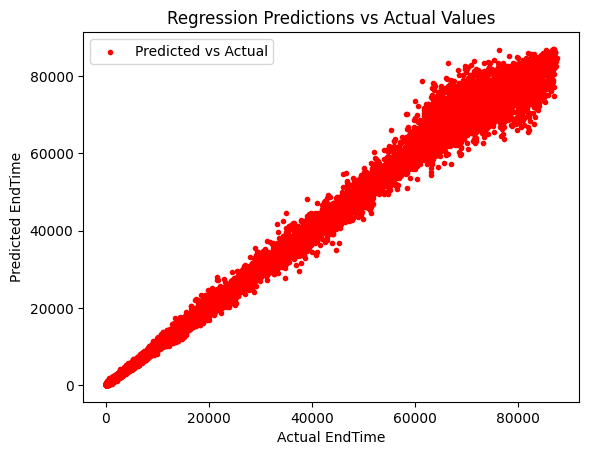

Plotting results done


In [8]:
#Visualize the results
plt.scatter(y_test,final_predictions, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')